In [285]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns 
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline
# set seabor graphs to a better style
sns.set(style="ticks")

from scipy import stats as stats
from scipy.stats import pearsonr

# 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.


In [111]:
claims = pd.read_csv('D:\Python_classe_files\Case Studies\Python Foundation Case Study 3 - Insurance Claims Case Study\Case Study 3 - Insurance Claims Case Study\claims.csv')
cust_data = pd.read_csv('D:\Python_classe_files\Case Studies\Python Foundation Case Study 3 - Insurance Claims Case Study\Case Study 3 - Insurance Claims Case Study\cust_demographics.csv')

In [112]:
final_data= pd.merge(claims,cust_data,left_on='customer_id', right_on='CUST_ID', how = 'left' )

# 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.


In [113]:
final_data.select_dtypes(include='object')

# As per checking the claim_date,DOB should be in datetime format , contact and amount in int format.

,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,Driver error,11/27/2017,Auto,No,Material only,$2980,No,Female,12-Jan-79,VT,789-916-8172,Platinum
1,Crime,10/03/2018,Home,Unknown,Material only,$2980,No,Female,13-Jan-70,ME,265-543-1264,Silver
2,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,Yes,Female,11-Mar-84,TN,798-631-4758,Silver
3,Natural causes,06/17/2018,Auto,No,Material only,$1680,No,Female,01-May-86,MA,413-187-7945,Silver
4,Crime,01/13/2018,Auto,No,Material only,$2680,No,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,Other driver error,06/11/2017,Auto,No,Material only,$3059,Yes,NaN,NaN,NaN,NaN,NaN
1096,Natural causes,03/14/2018,Auto,No,Material only,$1520,No,NaN,NaN,NaN,NaN,NaN
1097,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,Yes,NaN,NaN,NaN,NaN,NaN
1098,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,No,NaN,NaN,NaN,NaN,NaN


# 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [114]:
final_data['claim_amount']= final_data['claim_amount'].str.replace('$','')

C:\Users\Avinash Dubey\AppData\Local\Temp\ipykernel_25544\3862560297.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  final_data['claim_amount']= final_data['claim_amount'].str.replace('$','')


In [115]:
final_data['claim_amount']= final_data['claim_amount'].astype('float')

# 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [116]:
final_data['aler_flag']= final_data['police_report'].apply(lambda x: 1 if x=='Yes' else(0 if x=='No' else x))

# 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique.   Retain the most recent observation and delete any duplicated records inthe data based on the customer ID column.

In [117]:
final_data['claim_date']= pd.to_datetime(final_data['claim_date'],format= '%m/%d/%Y')

In [118]:
sort_data= final_data[['customer_id', 'claim_date']].sort_values(by = 'claim_date', ascending=False)

In [119]:
duplicate_value= sort_data.duplicated(subset='customer_id')

In [120]:
sort_data[duplicate_value]

,customer_id,claim_date
2,30308357,2018-02-02
4,19269962,2018-01-13
605,53539195,2017-12-24
5,21831191,2017-10-04
630,47830476,2017-04-12
604,85357756,2017-02-23
603,84147585,2017-01-07


In [121]:
final_data.drop_duplicates(subset= 'customer_id',keep='first',inplace= True,ignore_index= True)

# 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)


In [122]:
final_data['DateOfBirth'] = pd.to_datetime(final_data['DateOfBirth'], format= "%d-%b-%y")

In [123]:
categorical = final_data.select_dtypes(include = 'object')
numerical = final_data.select_dtypes(exclude='object')

In [124]:
final_data.isnull().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
CUST_ID                15
gender                 15
DateOfBirth            15
State                  15
Contact                15
Segment                15
aler_flag               0
dtype: int64

In [125]:
for i in categorical.columns:
    categorical[i].fillna(categorical[i].mode()[0],inplace=True)

In [126]:
numerical.isnull().sum()

claim_id                0
customer_id             0
claim_date              0
claim_amount           65
total_policy_claims    10
CUST_ID                15
DateOfBirth            15
dtype: int64

In [127]:
for i in numerical.columns:
    numerical[i].fillna(numerical[i].mean(), inplace=True)

In [128]:
numerical.isna().sum()

claim_id               0
customer_id            0
claim_date             0
claim_amount           0
total_policy_claims    0
CUST_ID                0
DateOfBirth            0
dtype: int64

In [129]:
concat_data= pd.concat([numerical, categorical],axis=1)

# 7. Calculate the age of customers in years. Based on the age, categorize thecustomers according to the below criteria

# Children < 18, Youth 18-30, Adult 30-60, Senior > 60

In [130]:
concat_data['claim_date'].max().year

2018

In [131]:
dt.datetime.now().year

2023

In [132]:
concat_data['Age']= concat_data['claim_date'].max().year- concat_data['DateOfBirth'].dt.year

In [133]:
concat_data['Age_cat']= concat_data['Age'].apply(lambda x: 'children' if x<18 else('youth' if 18<=x<=30 else('Adult' if 30<=x<60 else 'Senior')))

In [134]:
concat_data[concat_data['Age']<18].head()

,claim_id,customer_id,claim_date,claim_amount,total_policy_claims,CUST_ID,DateOfBirth,incident_cause,claim_area,police_report,claim_type,fraudulent,gender,State,Contact,Segment,aler_flag,Age,Age_cat
9,63246959,33507197,2017-07-22,2748.50000,2.0,33507197.0,2066-09-09,Crime,Auto,No,Material only,Yes,Female,RI,165-519-4583,Gold,0,-48,children
13,53780662,21240703,2018-09-19,1050.00000,1.0,21240703.0,2063-07-22,Other driver error,Auto,Unknown,Material only,No,Male,MD,473-561-2675,Silver,Unknown,-45,children
17,7809917,63916778,2017-07-22,17800.00000,1.0,63916778.0,2066-09-07,Other causes,Auto,No,Injury only,No,Male,IL,146-157-4572,Platinum,0,-48,children
18,29205389,17004138,2017-06-25,31380.00000,1.0,17004138.0,2065-08-13,Natural causes,Auto,No,Injury only,No,Female,WA,436-354-4682,Silver,0,-47,children
20,32630720,75584003,2017-02-03,12444.72714,1.0,75584003.0,2067-04-22,Crime,Auto,No,Material only,No,Female,OK,723-418-3248,Silver,0,-49,children


# 8. What is the average amount claimed by the customers from various segments?

In [135]:
concat_data[['Segment','claim_amount']].groupby('Segment')['claim_amount'].mean().to_frame()

,claim_amount
Segment,
Gold,12675.262946
Platinum,12368.233815
Silver,12267.349306


# 9. What is the total claim amount based on incident cause for all the claimsthat have been done at least 20 days prior to 1st of October, 2018.

In [136]:
filtered_data= concat_data[concat_data['claim_date']<= pd.to_datetime('2018-10-01')- pd.Timedelta(days= 20)]

In [138]:
filtered_data.groupby('incident_cause')['claim_amount'].sum()

incident_cause
Crime                 7.294856e+05
Driver error          3.292987e+06
Natural causes        1.315024e+06
Other causes          3.779919e+06
Other driver error    3.384079e+06
Name: claim_amount, dtype: float64

# 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [141]:
concat_data[['incident_cause','State','Age_cat']][(((concat_data['State']=='TX')|(concat_data['State']=='DE')|(concat_data['State']=='AK')) & (concat_data['incident_cause']=='Driver error')) & (concat_data['Age_cat']=='Adult')].groupby('State')['Age_cat'].count()

State
AK    4
DE    2
TX    2
Name: Age_cat, dtype: int64

# 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage onthe pie chart.

In [162]:
pie_data= concat_data[['claim_amount','gender','Segment']].groupby(['gender','Segment'])['claim_amount'].sum().reset_index()

In [167]:
df_pie= pie_data.pivot(index= 'Segment',columns='gender',values='claim_amount').stack()

Text(0.5, 1.0, 'claim amount of male/female with segment')

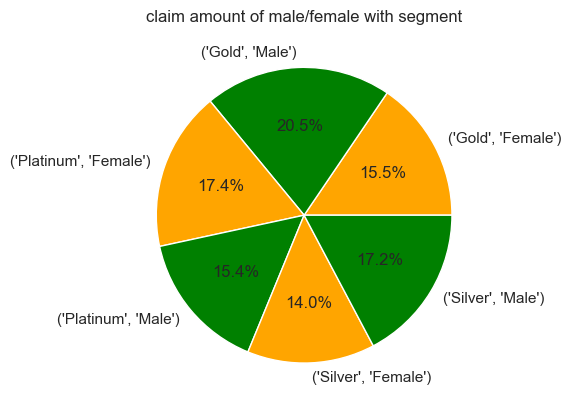

In [172]:
plt.pie(df_pie, labels=df_pie.index,autopct='%1.1f%%', colors=['orange', 'green'])
plt.title('claim amount of male/female with segment')

# 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart.

In [185]:
gender_claim=concat_data[['gender','incident_cause']][(concat_data['incident_cause']=='Driver error')|(concat_data['incident_cause']=='Other driver error')].groupby(['gender','incident_cause'])['incident_cause'].count().reset_index(name='count')

In [186]:
gender_claim

,gender,incident_cause,count
0,Female,Driver error,72
1,Female,Other driver error,149
2,Male,Driver error,185
3,Male,Other driver error,100


Text(0.5, 1.0, 'gender who claimed the most for any type of driver related issues')

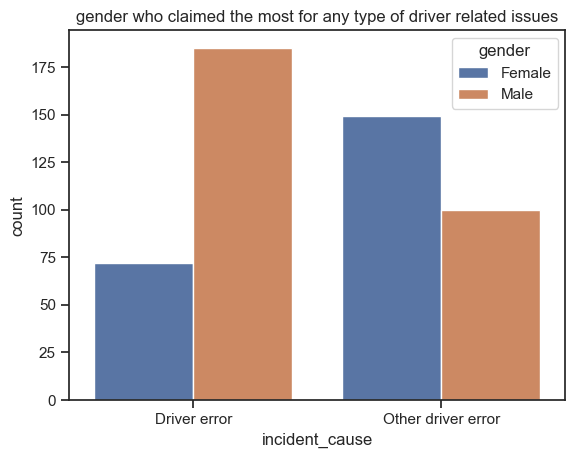

In [212]:
sns.barplot(x= 'incident_cause',y='count',hue= 'gender',data= gender_claim)
plt.title('gender who claimed the most for any type of driver related issues')

# 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [201]:
concat_data.columns

Index(['claim_id', 'customer_id', 'claim_date', 'claim_amount',
       'total_policy_claims', 'CUST_ID', 'DateOfBirth', 'incident_cause',
       'claim_area', 'police_report', 'claim_type', 'fraudulent', 'gender',
       'State', 'Contact', 'Segment', 'aler_flag', 'Age', 'Age_cat'],
      dtype='object')

In [207]:
max_fra= concat_data[['Age_cat', 'fraudulent']][concat_data['fraudulent']=='Yes'].groupby('Age_cat')['fraudulent'].count().reset_index()

Text(0.5, 1.0, 'count of fraudlent among the age group')

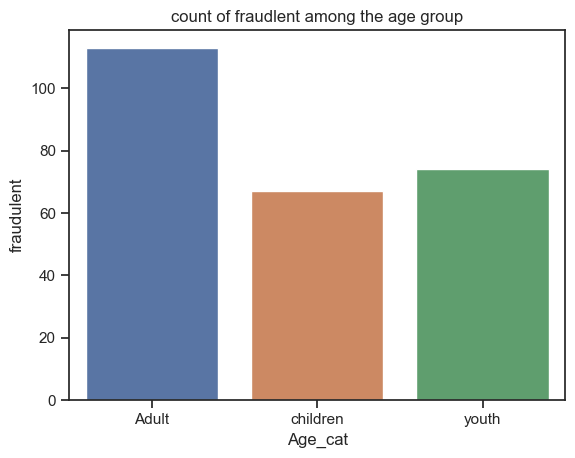

In [213]:
sns.barplot(x= 'Age_cat', y = 'fraudulent', data= max_fra)
plt.title('count of fraudlent among the age group')

# 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [221]:
data= concat_data[['claim_date', 'claim_amount']]
data['month']= data.loc[:,'claim_date'].dt.month_name()

C:\Users\Avinash Dubey\AppData\Local\Temp\ipykernel_25544\614528952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month']= data.loc[:,'claim_date'].dt.month_name()


In [222]:
list_=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [223]:
monthly_claim = data.groupby('month')['claim_amount'].sum()
mon_claim = monthly_claim[list_].reset_index()
mon_claim

,month,claim_amount
0,January,1.331832e+06
1,February,1.156579e+06
2,March,1.348315e+06
3,April,1.276020e+06
4,May,1.115035e+06
5,June,1.317728e+06
6,July,1.382493e+06
7,August,9.134147e+05
8,September,9.803903e+05
9,October,1.428671e+06


Text(0.5, 1.0, 'Monthly trend of the total amount')

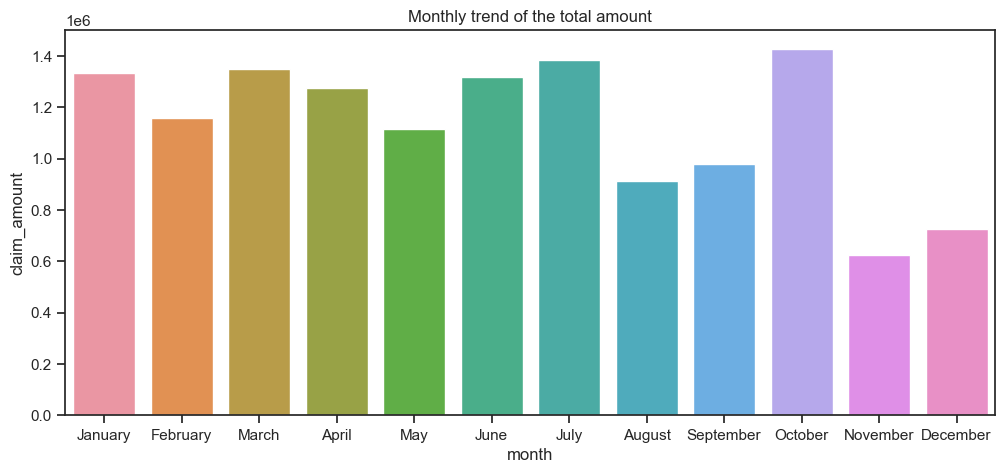

In [230]:
plt.figure(figsize=(12,5))
sns.barplot(x= 'month', y= 'claim_amount', data= mon_claim)
plt.title('Monthly trend of the total amount')

# 16. Is there any similarity in the amount claimed by males and females?

In [237]:
# Taking CI(confidence interval) =95%  and alpha(error rejection)= 0.05%
# H0= There is similarity
# Ha= There is no similarity
# Method applying T-test cause it is 2 tailed (two sample independent)

In [236]:
male = concat_data.loc[concat_data['gender']=='Male','claim_amount']
female = concat_data.loc[concat_data['gender']== 'Female', 'claim_amount']

In [239]:
stats.ttest_ind(male,female)

Ttest_indResult(statistic=0.821612848932144, pvalue=0.4114767802889234)

In [240]:
# alpha is bigger then test result = 0.5>0.4

In [242]:
# reject null hypothesis and accepet alternate


# There is no similartity

# 17. Is there any relationship between age category and segment?

In [243]:
# CI = 95%  and alpha = 0.5%
# H0= there can be relationship
# Ha= there can not be relationship

In [251]:
concat_data[['Age_cat','Segment']].head()

,Age_cat,Segment
0,Adult,Platinum
1,Adult,Silver
2,Adult,Silver
3,Adult,Silver
4,Adult,Gold


In [252]:
#Both are categorical variable hence we are using here Chi-square

In [253]:
rel = pd.crosstab(concat_data['Age_cat'], concat_data['Segment'])

In [255]:
stats.chi2_contingency(rel)

Chi2ContingencyResult(statistic=1.607685963753493, pvalue=0.8074100664578123, dof=4, expected_freq=array([[175.87191217, 164.48124428, 157.64684355],
       [ 91.82067704,  85.87374199,  82.30558097],
       [118.3074108 , 110.64501372, 106.04757548]]))

In [256]:
# Here we can see the value of pvalue is greater then 0.5% .
# We fail to reject the alternate hypothesis. 

# 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [262]:
current= concat_data['claim_amount'][concat_data['claim_date'].dt.year==2018]

In [261]:
# Ho = current year and before year was same i.e no change 
# HA = current year and before year is not same i.e there is change

In [265]:
stats.ttest_1samp(current, 10000)

TtestResult(statistic=4.308914037117706, pvalue=1.985741363740185e-05, df=487)

In [266]:
# Since 0.05>0.00001985741364  
# We can reject the null and accept alternate .

# 19. Is there any difference between age groups and insurance claims?

In [270]:
concat_data.columns

Index(['claim_id', 'customer_id', 'claim_date', 'claim_amount',
       'total_policy_claims', 'CUST_ID', 'DateOfBirth', 'incident_cause',
       'claim_area', 'police_report', 'claim_type', 'fraudulent', 'gender',
       'State', 'Contact', 'Segment', 'aler_flag', 'Age', 'Age_cat'],
      dtype='object')

In [275]:
# H0 = Can be difference
# Ha = Can not be difference

In [276]:
# Here we are using Annova due to compare the 3 groups

In [278]:
adult = concat_data['claim_amount'][concat_data['Age_cat']=='Adult']
youth = concat_data['claim_amount'][concat_data['Age_cat']=='youth']
children= concat_data['claim_amount'][concat_data['Age_cat']=='children']

In [280]:
stats.f_oneway(adult, youth, children)

F_onewayResult(statistic=2.2037228388804517, pvalue=0.1108830313065247)

In [281]:
# as 0.05 < 0.110883031306524
# therefore we accept null and reject alternate 

# 20. Is there any relationship between total number of policy claims and the claimed amount?

In [287]:
# H0 = There can be relationship.
# Ha = There can not be relationship.

In [283]:
concat_data[['total_policy_claims','claim_amount']]

,total_policy_claims,claim_amount
0,1.0,2980.0
1,3.0,2980.0
2,1.0,3369.5
3,1.0,1680.0
4,1.0,2680.0
...,...,...
1088,4.0,3059.0
1089,2.0,1520.0
1090,2.0,23575.0
1091,1.0,25120.0


In [288]:
pearsonr(concat_data['total_policy_claims'], concat_data['claim_amount'])

PearsonRResult(statistic=-0.016409477672452974, pvalue=0.587872176639291)

In [289]:
# the pvalue is 0.587872176639291>0.5 
# So we are able to accept null hypothesis.